# **Big Sales Prediction using Random Forest Regressor**

-------------

## **Objective**


#### Predict the sales of items in different stores using a Random Forest Regressor.

There are 12 variables in dataset.

1. Item_Identifier
2. Item_Weight: 
3. Item_Fat_Content
4. Item_Visibility
5. Item_Type
6. Item_MRP
7. Outlet_Identifier
8. Outlet_Establishment_Year
9. Outlet_Size
10. Outlet_Location_Type
11. Outlet_Type
12. Item_Outlet_Sales

## **Data Source**

####**Big Sales Data CSV File Link** :- https://github.com/YBIFoundation/Dataset/blob/main/Big%20Sales%20Data.csv

In [0]:
dbutils.fs.ls("dbfs:/FileStore/tables/")

[FileInfo(path='dbfs:/FileStore/tables/Admission_Chance.csv', name='Admission_Chance.csv', size=12905, modificationTime=1720190058000),
 FileInfo(path='dbfs:/FileStore/tables/Big_Sales_Data.csv', name='Big_Sales_Data.csv', size=1485002, modificationTime=1720342339000),
 FileInfo(path='dbfs:/FileStore/tables/Cancer.csv', name='Cancer.csv', size=125204, modificationTime=1720190099000),
 FileInfo(path='dbfs:/FileStore/tables/Credit_Default.csv', name='Credit_Default.csv', size=101152, modificationTime=1720190106000),
 FileInfo(path='dbfs:/FileStore/tables/Customer_Purchase.csv', name='Customer_Purchase.csv', size=1489, modificationTime=1720190113000),
 FileInfo(path='dbfs:/FileStore/tables/Fish.csv', name='Fish.csv', size=6349, modificationTime=1720190119000),
 FileInfo(path='dbfs:/FileStore/tables/Ice_Cream.csv', name='Ice_Cream.csv', size=4872, modificationTime=1720190124000),
 FileInfo(path='dbfs:/FileStore/tables/Test1.csv', name='Test1.csv', size=108, modificationTime=1720158698000),

## **Import Library**

In [0]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, mean, when
from pyspark.ml.feature import StringIndexer, VectorAssembler, StandardScaler
from pyspark.ml.regression import RandomForestRegressor
from pyspark.ml.evaluation import RegressionEvaluator

## Create Spark Session

In [0]:
spark = SparkSession.builder.appName("BigSalesPrediction").getOrCreate()

## **Import Data**

In [0]:
df = spark.read.csv("dbfs:/FileStore/tables/Big_Sales_Data.csv", header=True, inferSchema=True)

In [0]:
display(df)

Item_Identifier Item_Weight Item_Fat_Content Item_Visibility Item_Type Item_MRP Outlet_Identifier Outlet_Establishment_Year Outlet_Size Outlet_Location_Type Outlet_Type Item_Outlet_Sales FDT36 12.3 Low Fat 0.111447593 Baking Goods 33.4874 OUT049 1999 Medium Tier 1 Supermarket Type1 436.6087212 FDT36 12.3 Low Fat 0.111904005 Baking Goods 33.9874 OUT017 2007 Medium Tier 2 Supermarket Type1 443.1277212 FDT36 12.3 LF 0.111727876 Baking Goods 33.9874 OUT018 2009 Medium Tier 3 Supermarket Type2 564.5984 FDT36 12.3 Low Fat 0.0 Baking Goods 34.3874 OUT019 1985 Small Tier 1 Grocery Store 1719.37 FDP12 9.8 Regular 0.045522854 Baking Goods 35.0874 OUT017 2007 Medium Tier 2 Supermarket Type1 352.874 FDT36 12.3 Low Fat 0.111274591 Baking Goods 35.0874 OUT046 1997 Small Tier 1 Supermarket Type1 458.7362 FDQ36 7.855 Regular 0.161413005 Baking Goods 35.2848 OUT013 1987 High Tier 3 Supermarket Type1 299.3350723 FDT36 7.855 Low Fat 0.110735739 Baking Goods 35.2874 OUT027 1985 Medium Tier 3 Supermarket Type3 988.0472 FDQ36 7.855 Regular 0.161875063 Baking Goods 35.6848 OUT045 2002 Small Tier 2 Supermarket Type1 335.5632 FDT36 12.3 Low Fat 0.111500259 Baking Goods 35.6874 OUT045 2002 Small Tier 2 Supermarket Type1 846.8976 FDP12 9.8 Regular 0.045258247 Baking Goods 35.9874 OUT035 2004 Small Tier 2 Supermarket Type1 282.2992 FDT36 12.3 Low Fat 0.11125355 Baking Goods 36.0874 OUT035 2004 Small Tier 2 Supermarket Type1 483.8237718 FDP12 9.8 Regular 0.045358609 Baking Goods 36.1874 OUT045 2002 Small Tier 2 Supermarket Type1 423.4488 FDQ36 7.855 Regular 0.162205516 Baking Goods 36.2848 OUT018 2009 Medium Tier 3 Supermarket Type2 1155.8288 FDP12 9.8 Regular 0.045451204 Baking Goods 36.2874 OUT018 2009 Medium Tier 3 Supermarket Type2 384.0658416 FDP12 5.765 Regular 0.0450476 Baking Goods 36.4874 OUT027 1985 Medium Tier 3 Supermarket Type3 809.9743383 FDW23 5.765 Low Fat 0.081944045 Baking Goods 36.7164 OUT013 1987 High Tier 3 Supermarket Type1 849.5608 FDP12 9.8 Regular 0.045337184 Baking Goods 36.8874 OUT049 1999 Medium Tier 1 Supermarket Type1 564.5984 FDP12 9.8 Regular 0.045266806 Baking Goods 36.9874 OUT046 1997 Small Tier 1 Supermarket Type1 705.748 FDW23 5.765 Low Fat 0.082178616 Baking Goods 37.0164 OUT045 2002 Small Tier 2 Supermarket Type1 540.6296 FDQ36 7.855 Regular 0.161516894 Baking Goods 37.0848 OUT035 2004 Small Tier 2 Supermarket Type1 447.4176 FDP12 9.8 Regular 0.045229136 Baking Goods 37.1874 OUT013 1987 High Tier 3 Supermarket Type1 386.3027112 FDW23 5.765 Low Fat 0.0821398 Baking Goods 37.2164 OUT049 1999 Medium Tier 1 Supermarket Type1 579.246 FDQ36 7.855 Regular 0.161798604 Baking Goods 37.2848 OUT049 1999 Medium Tier 1 Supermarket Type1 745.696 FDT36 12.3 Low Fat 0.186250852 Baking Goods 37.2874 OUT010 1998 Medium Tier 3 Grocery Store 176.437 FDT36 12.3 Low Fat 0.0 Baking Goods 37.2874 OUT013 1987 High Tier 3 Supermarket Type1 705.748 FDW23 12.3 Low Fat 0.143592939 Baking Goods 37.3164 OUT019 1985 Small Tier 1 Grocery Store 38.6164 FDW23 5.765 Low Fat 0.082012293 Baking Goods 37.5164 OUT046 1997 Small Tier 1 Supermarket Type1 656.4788 FDQ36 7.855 Regular 0.0 Baking Goods 38.1848 OUT019 1985 Small Tier 1 Grocery Store 37.2848 FDQ36 7.855 Regular 0.0 Baking Goods 38.3848 OUT046 1997 Small Tier 1 Supermarket Type1 932.12 FDW23 5.765 Low Fat 0.081615145 Baking Goods 38.6164 OUT027 1985 Medium Tier 3 Supermarket Type3 473.1523788 FDW23 5.765 Low Fat 0.082476188 Baking Goods 38.8164 OUT017 2007 Medium Tier 2 Supermarket Type1 239.4409042 FDW23 5.765 Low Fat 0.082346376 Baking Goods 38.8164 OUT018 2009 Medium Tier 3 Supermarket Type2 237.2031388 FDQ36 5.765 Regular 0.16076514 Baking Goods 39.0848 OUT027 1985 Medium Tier 3 Supermarket Type3 243.1173823 FDQ36 7.855 Regular 0.162461219 Baking Goods 39.2848 OUT017 2007 Medium Tier 2 Supermarket Type1 857.5504 FDM60 10.8 Regular 0.0 Baking Goods 39.3138 OUT013 1987 High Tier 3 Supermarket Type1 1015.345 FDM60 10.8 Regular 0.080582001 Baking Goods 39.4138 OUT010 1998 Medium Tier 3 Grocery Stor

In [0]:
df.printSchema()

root
 |-- Item_Identifier: string (nullable = true)
 |-- Item_Weight: double (nullable = true)
 |-- Item_Fat_Content: string (nullable = true)
 |-- Item_Visibility: double (nullable = true)
 |-- Item_Type: string (nullable = true)
 |-- Item_MRP: double (nullable = true)
 |-- Outlet_Identifier: string (nullable = true)
 |-- Outlet_Establishment_Year: integer (nullable = true)
 |-- Outlet_Size: string (nullable = true)
 |-- Outlet_Location_Type: string (nullable = true)
 |-- Outlet_Type: string (nullable = true)
 |-- Item_Outlet_Sales: double (nullable = true)



## **Describe Data**

In [0]:
display(df.describe())


summary Item_Identifier Item_Weight Item_Fat_Content Item_Visibility Item_Type Item_MRP Outlet_Identifier Outlet_Establishment_Year Outlet_Size Outlet_Location_Type Outlet_Type Item_Outlet_Sales count 14204 11815 14204 14204 14204 14204 14204 14204 14204 14204 14204 14204 mean null 12.788355480322409 null 0.06595278007399319 null 141.0049772599268 null 1997.8306814981695 null null null 2185.8363199827995 stddev null 4.654126119868946 null 0.051458595248422966 null 62.08693801476398 null 8.371663870896088 null null null 1827.479550251416 min DRA12 4.555 LF 0.0 Baking Goods 31.29 OUT010 1985 High Tier 1 Grocery Store 33.29 max NCZ54 30.0 reg 0.328390948 Starchy Foods 266.8884 OUT049 2009 Small Tier 3 Supermarket Type3 31224.72695

# Get Missing Values Complete

In [0]:
# Fill missing values in 'Item_Weight' with mean value based on 'Item_Type'
mean_weights = df.groupBy('Item_Type').agg(mean('Item_Weight').alias('mean_weight'))
df = df.join(mean_weights, on='Item_Type', how='left').withColumn('Item_Weight', when(col('Item_Weight').isNull(), col('mean_weight')).otherwise(col('Item_Weight'))).drop('mean_weight')

In [0]:
display(df.describe())

summary Item_Type Item_Identifier Item_Weight Item_Fat_Content Item_Visibility Item_MRP Outlet_Identifier Outlet_Establishment_Year Outlet_Size Outlet_Location_Type Outlet_Type Item_Outlet_Sales count 14204 14204 14204 14204 14204 14204 14204 14204 14204 14204 14204 14204 mean null null 12.79064211000949 null 0.06595278007399319 141.0049772599268 null 1997.8306814981695 null null null 2185.8363199827995 stddev null null 4.251186344518246 null 0.051458595248422966 62.08693801476398 null 8.371663870896088 null null null 1827.479550251416 min Baking Goods DRA12 4.555 LF 0.0 31.29 OUT010 1985 High Tier 1 Grocery Store 33.29 max Starchy Foods NCZ54 30.0 reg 0.328390948 266.8884 OUT049 2009 Small Tier 3 Supermarket Type3 31224.72695

# Get Categories and Counts of Categorical Variables

In [0]:
df.groupBy('Item_Identifier').count().show()

+---------------+-----+
|Item_Identifier|count|
+---------------+-----+
|          FDU24|    9|
|          FDW60|    8|
|          FDO11|   10|
|          FDW52|    8|
|          DRA24|   10|
|          FDB11|    9|
|          FDQ20|    9|
|          FDY43|    8|
|          NCW05|    9|
|          NCN30|    9|
|          NCS30|    9|
|          NCL54|    8|
|          FDP39|   10|
|          FDN15|   10|
|          FDU10|    8|
|          FDX27|    9|
|          FDW32|   10|
|          FDD20|    9|
|          NCF42|   10|
|          NCW18|    8|
+---------------+-----+
only showing top 20 rows



In [0]:
df.groupBy('Item_Fat_Content').count().show()

+----------------+-----+
|Item_Fat_Content|count|
+----------------+-----+
|         low fat|  178|
|         Low Fat| 8485|
|              LF|  522|
|         Regular| 4824|
|             reg|  195|
+----------------+-----+



In [0]:
# Replace values in 'Item_Fat_Content'
df = df.replace(['LF', 'low fat', 'reg'], ['Low Fat', 'Low Fat', 'Regular'], 'Item_Fat_Content')

In [0]:
df.groupBy('Item_Fat_Content').count().show()

+----------------+-----+
|Item_Fat_Content|count|
+----------------+-----+
|         Low Fat| 9185|
|         Regular| 5019|
+----------------+-----+



In [0]:
# Encode categorical variables
indexer_fat_content = StringIndexer(inputCol="Item_Fat_Content", outputCol="Item_Fat_Content_Index")
indexer_item_type = StringIndexer(inputCol="Item_Type", outputCol="Item_Type_Index")
indexer_identifier = StringIndexer(inputCol="Outlet_Identifier", outputCol="Outlet_Identifier_Index")
indexer_size = StringIndexer(inputCol="Outlet_Size", outputCol="Outlet_Size_Index")
indexer_location = StringIndexer(inputCol="Outlet_Location_Type", outputCol="Outlet_Location_Type_Index")
indexer_outlet_type = StringIndexer(inputCol="Outlet_Type", outputCol="Outlet_Type_Index")

In [0]:
df = indexer_fat_content.fit(df).transform(df)
df = indexer_item_type.fit(df).transform(df)
df = indexer_identifier.fit(df).transform(df)
df = indexer_size.fit(df).transform(df)
df = indexer_location.fit(df).transform(df)
df = indexer_outlet_type.fit(df).transform(df)

# Define y (Item_Outlet_Sales) and X (features)

In [0]:
features = [
    'Item_Weight', 'Item_Fat_Content_Index', 'Item_Visibility',
    'Item_Type_Index', 'Item_MRP', 'Outlet_Identifier_Index',
    'Outlet_Establishment_Year', 'Outlet_Size_Index', 'Outlet_Location_Type_Index',
    'Outlet_Type_Index'
]

In [0]:
assembler = VectorAssembler(inputCols=features, outputCol="features")
df = assembler.transform(df)

In [0]:
# Standardize features
scaler = StandardScaler(inputCol="features", outputCol="scaledFeatures")
scalerModel = scaler.fit(df)
df = scalerModel.transform(df)

In [0]:
# Split the data
train_data, test_data = df.randomSplit([0.8, 0.2], seed=12529)

# Train Model

In [0]:
rfr = RandomForestRegressor(featuresCol="scaledFeatures", labelCol="Item_Outlet_Sales")
model = rfr.fit(train_data)

# Model Prediction

In [0]:
predictions = model.transform(test_data)

In [0]:
predictions.select("Item_Outlet_Sales", "prediction").show(5)

+-----------------+------------------+
|Item_Outlet_Sales|        prediction|
+-----------------+------------------+
|       793.124553|1437.8932954639656|
|        1701.7848|1351.0261047491367|
|        1134.5232|1357.1554160719725|
|        1922.8304|1468.6970643581092|
|      1082.103691|1437.7930891771498|
+-----------------+------------------+
only showing top 5 rows



# Model Evaluation

In [0]:
evaluator = RegressionEvaluator(labelCol="Item_Outlet_Sales", predictionCol="prediction")

mse = evaluator.evaluate(predictions, {evaluator.metricName: "mse"})
mae = evaluator.evaluate(predictions, {evaluator.metricName: "mae"})
r2 = evaluator.evaluate(predictions, {evaluator.metricName: "r2"})

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R2 Score: {r2}")

Mean Squared Error: 1660468.775361318
Mean Absolute Error: 832.503583640771
R2 Score: 0.48487635306284527


# Visualization of Actual Vs Predicted Results

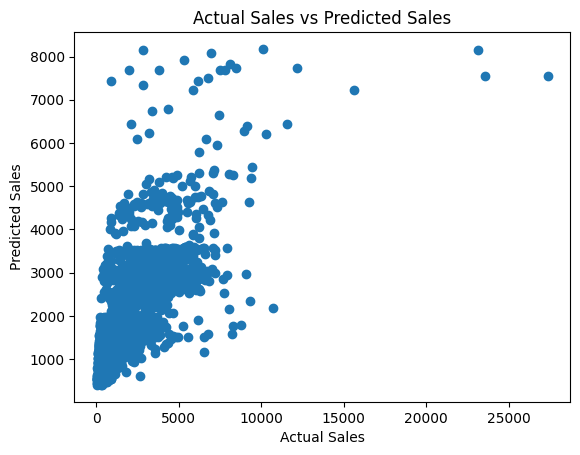

In [0]:
import matplotlib.pyplot as plt

y_test = [row['Item_Outlet_Sales'] for row in predictions.select("Item_Outlet_Sales").collect()]
y_pred = [row['prediction'] for row in predictions.select("prediction").collect()]

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual Sales vs Predicted Sales")
plt.show()

# Save the model for Deployment

In [0]:
# Save the trained linear regression model
model_path = "./Internship_Sem-6_models/Big_Sales_Prediction_model"
model.save(model_path)

In [0]:
dbutils.fs.ls("dbfs:/Internship_Sem-6_models/Big_Sales_Prediction_model")

[FileInfo(path='dbfs:/Internship_Sem-6_models/Big_Sales_Prediction_model/data/', name='data/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/Internship_Sem-6_models/Big_Sales_Prediction_model/metadata/', name='metadata/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/Internship_Sem-6_models/Big_Sales_Prediction_model/treesMetadata/', name='treesMetadata/', size=0, modificationTime=0)]

## **Explaination**

The evaluation metrics provided for the Random Forest Regressor model are Mean Squared Error (MSE), Mean Absolute Error (MAE), and R² score. Here is an explanation of each metric and the specific values obtained:

### Mean Squared Error (MSE)
- **Definition**: MSE is the average of the squares of the errors, where the error is the difference between the actual and predicted values. It gives a rough idea of the magnitude of the error.
- **Value**: 1,660,468.775361318
- **Interpretation**: This value indicates the average squared difference between the actual and predicted sales values. A lower MSE would indicate a better fit, meaning the predictions are closer to the actual values. However, since it is in squared units, it can sometimes be hard to interpret directly.

### Mean Absolute Error (MAE)
- **Definition**: MAE is the average of the absolute differences between the actual and predicted values. It provides a straightforward measure of prediction accuracy.
- **Value**: 832.503583640771
- **Interpretation**: On average, the model's predictions are off by approximately 832.50 units of sales. MAE is easier to interpret than MSE because it is in the same units as the original data, but it doesn't penalize larger errors as heavily as MSE.

### R² Score (Coefficient of Determination)
- **Definition**: R² score indicates how well the model's predictions approximate the actual data. It is the proportion of the variance in the dependent variable that is predictable from the independent variables.
- **Value**: 0.48487635306284527
- **Interpretation**: An R² score of 0.4849 means that approximately 48.49% of the variance in the sales data is explained by the model. This is a moderate score, suggesting that the model captures some of the underlying patterns in the data, but there is still a significant amount of unexplained variance.

### Summary
- **MSE**: Indicates the average squared error; the value suggests that there is a significant error in the predictions.
- **MAE**: Indicates the average absolute error; the model's predictions deviate from the actual values by around 832.50 units on average.
- **R² Score**: Shows that the model explains about 48.49% of the variance in the sales data, which means there is room for improvement.

### Potential Improvements
To improve the model's performance, consider the following approaches:
1. **Feature Engineering**: Create new features or transform existing ones to better capture the underlying patterns in the data.
2. **Model Tuning**: Adjust the hyperparameters of the Random Forest Regressor or try other regression algorithms such as Gradient Boosting, XGBoost, or linear models.
3. **Data Cleaning**: Ensure that the data is clean, with minimal missing values and outliers.
4. **Increasing Data**: More data can sometimes help the model learn better patterns, especially if the current dataset is small.
5. **Cross-Validation**: Use cross-validation to ensure the model's performance is consistent across different subsets of the data.